In [1]:
#2.2 最小二乘法求解多元线性回归的参数

In [2]:
#2.3 linear_model.LinearRegression

In [3]:
#1. 导入需要的模块和库

In [4]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [5]:
#2. 导入数据，探索数据

In [6]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

In [7]:
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看

In [9]:
y = housevalue.target

In [10]:
X.shape

(20640, 8)

In [11]:
y.shape

(20640,)

In [12]:
y.max()

5.00001

In [13]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
housevalue.feature_names #特征的名字

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
X.columns = housevalue.feature_names
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [16]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
#3. 分训练集和测试集

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
Xtrain.shape
#如果希望进行数据标准化，还记得应该怎么做吗？
#先用训练集训练标准化的类，然后用训练好的类分别转化训练集和测试集

(14448, 8)

In [20]:
#4. 建模

In [21]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [22]:
yhat.min()

-0.6528439725035824

In [23]:
yhat.max()

7.146198214270839

In [24]:
#5. 探索建好的模型

In [25]:
reg.coef_ #W,系数的向量

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [26]:
[*zip(Xtrain.columns,reg.coef_)] #可以解释对我们的y有多大的影响

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294493672),
 ('AveRooms', -0.10780721617317635),
 ('AveBedrms', 0.6264338275363786),
 ('Population', 5.21612535341231e-07),
 ('AveOccup', -0.0033485096463336797),
 ('Latitude', -0.413095937894771),
 ('Longitude', -0.42621095362084827)]

In [27]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [28]:
reg.intercept_ #截距

-36.256893229204074

In [29]:
#3 回归类的模型评估指标

In [30]:
#3.1 是否预测了正确的数值

In [31]:
from sklearn.metrics import mean_squared_error as MSE

In [32]:
MSE(yhat,Ytest)

0.5309012639324571

In [33]:
Ytest.mean()

2.0819292877906976

In [34]:
y.max()

5.00001

In [35]:
y.min()

0.14999

In [36]:
#cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error") 

In [37]:
#为什么报错了？来试试看！
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [38]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [39]:
#3.2 是否拟合了足够的信息

In [40]:
#调用R2
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)

0.3380653761555984

In [41]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178817

In [42]:
#我们现在踩到了线性回归的大坑二号：相同的评估指标不同的结果

In [43]:
#R2涉及到的计算中对预测值和真实值有极大的区别，必须是预测值在分子，真实值在分母，所以我们在调用metrcis模块中的模型评估指标的时候，必须要检查清楚，指标的参数中，究竟是要求我们先输入真实值还是先输入预测值。

In [44]:
#使用shift tab键来检查究竟哪个值先进行输入
r2_score(Ytest,yhat) 

0.6043668160178817

In [45]:
#或者你也可以指定参数，就不必在意顺序了
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178817

In [46]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524556

In [47]:
import matplotlib.pyplot as plt
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

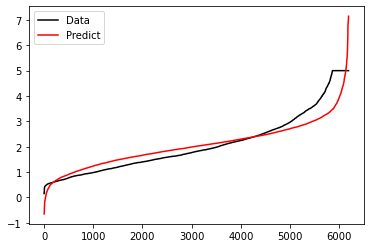

In [48]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [49]:
import numpy as np
rng = np.random.RandomState(42) 
X = rng.randn(100, 80) 
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.11480837,   -5.70837982,  -15.38196168,  -77.07714165,
        -61.98484963])

In [50]:
#好了，现在我们跋山涉水来到了线性回归的三号大坑R方负的 。

In [51]:
#4 多重共线性：岭回归与Lasso

In [52]:
#4.1 最熟悉的陌生人：多重共线性

In [53]:
#4.2 岭回归

In [54]:
#4.2.1 岭回归解决多重共线性问题

In [55]:
#4.2.2 linear_model.Ridge

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [57]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"] 
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #数据集索引恢复

In [59]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [60]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 
#没有特别明显的变动，共线性无

0.6043610352312279

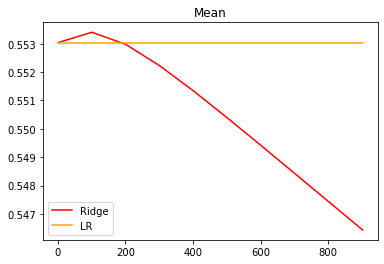

In [61]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

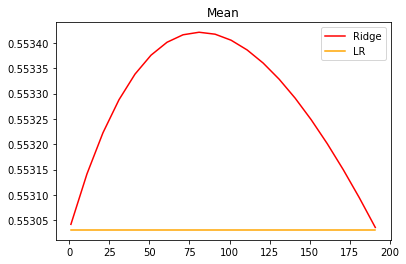

In [62]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

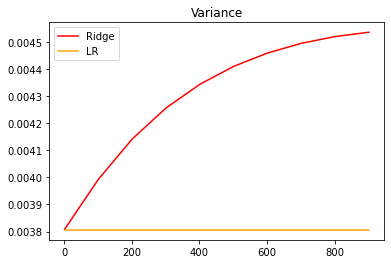

In [63]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

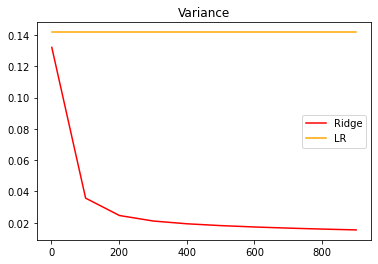

In [64]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

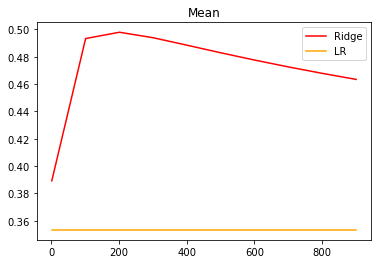

In [65]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

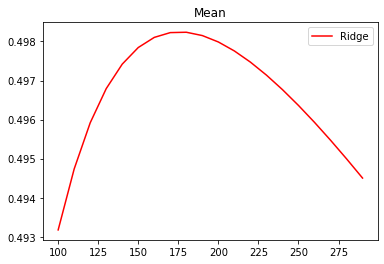

In [66]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [67]:
#4.2.3 选取最佳的正则化参数取值

H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\work user\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36857 missing from current font.
  fon

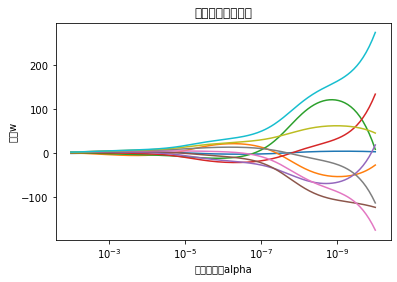

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#创造10*10的希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10) 

#计算横坐标
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas) 

#建模，获取每一个正则化取值下的系数组合
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
#绘图展示结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #将横坐标逆转
plt.xlabel('正则化参数alpha')
plt.ylabel('系数w')
plt.title('岭回归下的岭迹图')
plt.axis('tight')
plt.show()

In [69]:
#在sklearn中，我们有带交叉验证的岭回归可以使用

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
                ).fit(X, y)

In [71]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y) 

0.606025176733844

In [72]:
#调用所有交叉验证的结果

In [73]:
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [74]:
Ridge_.cv_values_.shape

(20640, 10)

In [75]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0) 

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [76]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

In [77]:
#4.3 Lasso

In [78]:
#4.3.1 Lasso与多重共线性

In [79]:
#4.3.2 Lasso的核心作用：特征选择

In [80]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [81]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"] 
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [82]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain) 
(reg.coef_*100).tolist()

[43.73589305968401,
 1.0211268294493672,
 -10.780721617317635,
 62.64338275363785,
 5.2161253534123096e-05,
 -0.33485096463336794,
 -41.3095937894771,
 -42.62109536208483]

In [83]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.73589305968398,
 1.0211268294494116,
 -10.78072161731758,
 62.643382753637276,
 5.2161253532697085e-05,
 -0.33485096463335795,
 -41.3095937894769,
 -42.62109536208446]

In [84]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

<ipython-input-84-43c8c17e9553>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
H:\work user\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
H:\work user\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139107, tolerance: 1.917255476913148
  model = cd_fast.enet_coordinate_descent(


[43.73589305968403,
 1.0211268294494056,
 -10.780721617317713,
 62.643382753638086,
 5.216125353268129e-05,
 -0.33485096463335795,
 -41.30959378947712,
 -42.6210953620847]

In [85]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.73575720621596,
 1.0211292318121803,
 -10.780460336251622,
 62.64202320775658,
 5.217068073242414e-05,
 -0.33485065170676187,
 -41.30957143229132,
 -42.62105388932396]

In [86]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[40.10568371834486,
 1.0936292607860143,
 -3.7423763610244563,
 26.524037834897207,
 0.00035253685115039395,
 -0.3207129394887798,
 -40.06483047344844,
 -40.81754399163317]

In [87]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[34.62081517607693,
 1.5196170869238688,
 0.3968610529210192,
 0.9151812510354818,
 0.0021739238012248416,
 -0.34768660148100994,
 -14.736963474215269,
 -13.435576102526921]

In [88]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [89]:
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.0002806598632900997,
 -0.0,
 -0.0,
 -0.0]

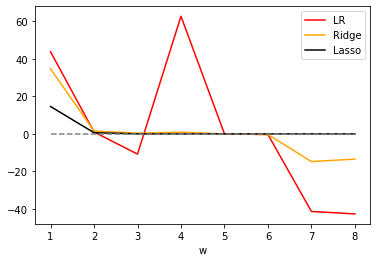

In [90]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

In [91]:
#4.3.3 选取最佳的正则化参数取值

In [92]:
from sklearn.linear_model import LassoCV

#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10) #200个值 

#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方

In [93]:
alpharange

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [94]:
alpharange.shape

(200,)

In [95]:
Xtrain.head()
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
                ,cv=5 #交叉验证的折数
                ).fit(Xtrain, Ytrain) 

#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [96]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [97]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [98]:
lasso_.mse_path_.mean(axis=1) #有注意到在岭回归中我们的轴向是axis=0吗？

#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [99]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [100]:
lasso_.score(Xtest,Ytest)

0.6038982670571436

In [101]:
#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 

0.6043668160178817

In [102]:
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
                ,n_alphas=300
                ,cv=5
                ).fit(Xtrain, Ytrain)

In [103]:
ls_.alpha_

0.0020954551690628535

In [104]:
ls_.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [105]:
ls_.alphas_.shape

(300,)

In [106]:
ls_.score(Xtest,Ytest)

0.6038915423819201

In [107]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

In [ ]:
#5 非线性问题：多项式回归

In [108]:
#5.1.3 线性模型与非线性模型

In [109]:
#1. 导入所需要的库

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [111]:
#2. 创建需要拟合的数据集

In [112]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
X #作为我的横坐标

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

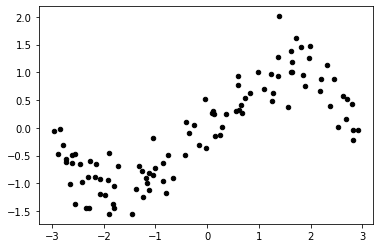

In [117]:
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [118]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [119]:
X = X.reshape(-1, 1)

In [121]:
X.shape

(100, 1)

In [ ]:
#3. 使用原始数据进行建模

In [122]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y) 

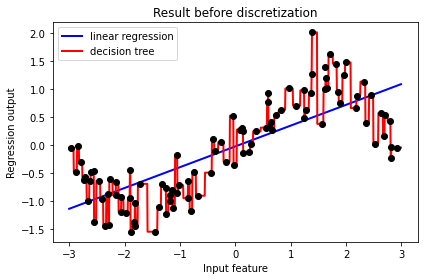

In [124]:
#放置画布
fig, ax1 = plt.subplots(1) 

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='blue',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree") 

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') 

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()
#从这个图像来看，可以得出什么结果？

In [ ]:
#5.2 使用分箱处理非线性问题

In [ ]:
#1. 导入所需要的库

In [ ]:
#2. 创建需要拟合的数据集

In [ ]:
#3. 使用原始数据进行建模

In [ ]:
#4. 分箱及分箱的相关问题

In [125]:
from sklearn.preprocessing import KBinsDiscretizer

#将数据分箱
enc = KBinsDiscretizer(n_bins=10 #分几类？
                      ,encode="onehot") #ordinal一列 使用什么样子的模式
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0

In [126]:
X.shape

(100, 1)

In [127]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [128]:
#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)

In [132]:
line.shape

(1000, 1)

In [130]:
#LinearR_.predict(line) #line作为测试集 测试数据与训练数据的格式要一直

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [133]:
line.shape #测试

(1000, 1)

In [134]:
X_binned.shape #训练

(100, 10)

In [135]:
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)
line_binned.shape #分箱后的数据是无法进行绘图的

(1000, 10)

In [136]:
line_binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [137]:
LinearR_.predict(line_binned).shape

(1000,)

In [ ]:
#5. 使用分箱数据进行建模和绘图

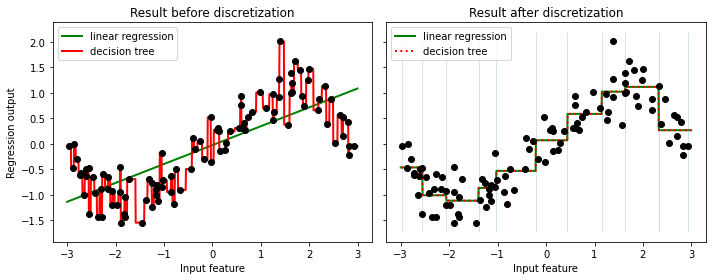

In [138]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line) 

#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                              , sharey=True #让两张图共享y轴上的刻度
                              , figsize=(10, 4))

#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")

ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization") 

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y) 

#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
        , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        , linewidth=2
        , color='green'
        , linestyle='-'
        , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
        linestyle=':', label='decision tree') 

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴 分出箱子的上限和下限
            , *plt.gca().get_ylim() #y轴的上限和下限
            , linewidth=1
            , alpha=.2) 

#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k') #其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [ ]:
#6. 箱子数如何影响模型的结果

0.9266086471437827


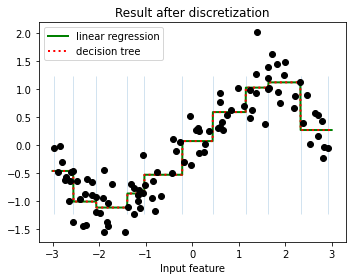

In [140]:
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line #横坐标
        , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        , linewidth=2
        , color='green'
        , linestyle='-'
        , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
        linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [ ]:
#7. 如何选取最优的箱数

In [ ]:
#怎样选取最优的箱子?

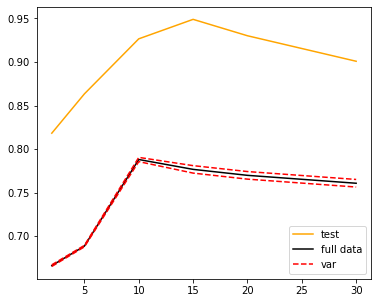

In [141]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

In [ ]:
#5.3 多项式回归PolynomialFeatures

In [ ]:
#5.3.1 多项式对数据做了什么

In [143]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [145]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1) 
X

array([[1],
       [2],
       [3]])

In [146]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2) 

#接口transform直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [147]:
X_.shape

(3, 3)

In [148]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [151]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X) 

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [150]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [152]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3) 
y#生成了多少个系数？

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [153]:
LinearRegression().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [154]:
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [157]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept
#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [156]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [158]:
#2维度

In [160]:
X = np.arange(6).reshape(3, 2) 
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [159]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [161]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [162]:
#sklearn中存在着控制是否要生成平方和立方项的参数interaction_only，默认为 False，以减少共线性。来看这个参数是如何工作的：

In [163]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [164]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X) #对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [165]:
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3) 
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [166]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [167]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [168]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)
X_.shape

(3, 1771)

In [ ]:
#5.3.2 多项式回归处理非线性问题

In [169]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) 
y = np.sin(X) + rnd.normal(size=len(X)) / 3 

#将X升维，准备好放入sklearn中 
X = X.reshape(-1,1) 

#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

In [170]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y) 

#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [171]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [172]:
#多项式拟合，设定高次项
d=5 #进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = PF(degree=d).fit_transform(line) 

In [173]:
#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.8561679370344799

In [174]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787954

In [ ]:
#如果我们将这个过程可视化：

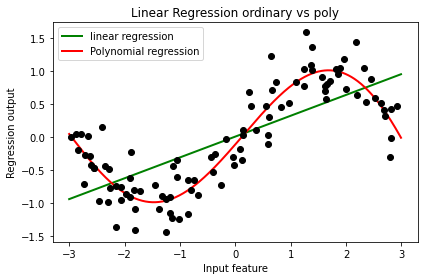

In [180]:
import matplotlib.pyplot as plt
d=5

#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line) 

#放置画布
fig, ax1 = plt.subplots(1) #将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red',label="Polynomial regression") #将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') 

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()
#来一起鼓掌，感叹多项式回归的神奇
#随后可以试试看较低和较高的次方会发生什么变化
#d=2
#d=20

In [ ]:
#5.3.3 多项式回归的可解释性

In [181]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [182]:
X = np.arange(9).reshape(3, 3) 
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [183]:
poly = PolynomialFeatures(degree=5).fit(X) 

#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [187]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target

In [184]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [188]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [189]:
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [191]:
X_ = poly.transform(X) 
X_

array([[ 1.00000000e+00,  8.32520000e+00,  4.10000000e+01, ...,
         1.43489440e+03, -4.63007240e+03,  1.49401729e+04],
       [ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01, ...,
         1.43337960e+03, -4.62724920e+03,  1.49377284e+04],
       [ 1.00000000e+00,  7.25740000e+00,  5.20000000e+01, ...,
         1.43262250e+03, -4.62678400e+03,  1.49426176e+04],
       ...,
       [ 1.00000000e+00,  1.70000000e+00,  1.70000000e+01, ...,
         1.55472490e+03, -4.77970460e+03,  1.46942884e+04],
       [ 1.00000000e+00,  1.86720000e+00,  1.80000000e+01, ...,
         1.55472490e+03, -4.78364760e+03,  1.47185424e+04],
       [ 1.00000000e+00,  2.38860000e+00,  1.60000000e+01, ...,
         1.54999690e+03, -4.77321880e+03,  1.46991376e+04]])

In [192]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919541435538823e-08),
 ('住户收入中位数', -11.243025626342437),
 ('房屋使用年代中位数', -0.8488985558284562),
 ('平均房间数目', 6.4410593651213635),
 ('平均卧室数目', -31.591330651295365),
 ('街区人口', 0.00040609067929028186),
 ('平均入住率', 1.003862327021211),
 ('街区的纬度', 8.705681910190394),
 ('街区的经度', 5.8806327457107965),
 ('住户收入中位数^2', -0.0313081213151669),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599480067008538),
 ('住户收入中位数 平均房间数目', 0.043302039980649264),
 ('住户收入中位数 平均卧室数目', -0.18614230762148926),
 ('住户收入中位数 街区人口', 5.728314525856295e-05),
 ('住户收入中位数 平均入住率', -0.0025901945279693736),
 ('住户收入中位数 街区的纬度', -0.15250571773355712),
 ('住户收入中位数 街区的经度', -0.1442429442847879),
 ('房屋使用年代中位数^2', 0.00021172534934901734),
 ('房屋使用年代中位数 平均房间数目', -0.001262189925797411),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504463207522),
 ('房屋使用年代中位数 街区人口', 2.818852232910943e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694880040896),
 ('房屋使用年代中位数 街区的纬度', -0.010069037386845982),
 ('房屋使用年代中位数 街区的经度', -0.009999501833041565),
 ('平均房间数目^2', 0.00726947766112956),
 ('平均房间数目 平均卧

In [204]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [205]:
coeff

,0,1
0,1,0.436693
1,住户收入中位数,0.00943578
2,房屋使用年代中位数,-0.107322
3,平均房间数目,0.645066
4,平均卧室数目,-3.97639e-06
...,...,...
490,街区的纬度^4,None
491,街区的纬度^3 街区的经度,None
492,街区的纬度^2 街区的经度^2,None
493,街区的纬度 街区的经度^3,None


In [206]:
coeff.columns = ["feature","coef"]

In [207]:
coeff.sort_values(by="coef")

,feature,coef
7,街区的纬度,-0.434514
6,平均入住率,-0.421314
2,房屋使用年代中位数,-0.107322
5,街区人口,-0.00378654
4,平均卧室数目,-3.97639e-06
...,...,...
490,街区的纬度^4,None
491,街区的纬度^3 街区的经度,None
492,街区的纬度^2 街区的经度^2,None
493,街区的纬度 街区的经度^3,None


In [198]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [199]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [201]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7451061367299125
time:1.496079921722412


In [202]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9742923837832377
time:16.801957607269287
